In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [82]:
train = pd.read_csv("data/train.csv")
testA = pd.read_csv("data/testA.csv")

In [83]:
print('Train data shape:',train.shape)
print('TestA data shape:',testA.shape)
train.head()

Train data shape: (800000, 47)
TestA data shape: (200000, 46)


,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [84]:
label = train["isDefault"]
#del train["isDefault"]
label.value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

(a) 数据EDA

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [86]:
# 缺失值(可进一步查看缺失特征中缺失率大于threshold的特征)
train.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

In [87]:
# 将特征分为定量数据和定性数据
numerical_feat = ['id', 'loanAmnt','interestRate','installment','employmentTitle','annualIncome', 'isDefault',
'postCode','regionCode','dti','delinquency_2years','ficoRangeLow','ficoRangeHigh','openAcc','pubRec',
'pubRecBankruptcies','revolBal','revolUtil','totalAcc','title','n0','n1','n2', 'n3','n4','n5','n6',
'n7','n8','n9','n10','n13','n14']
category_feat = ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine','term',
'purpose', 'homeOwnership','verificationStatus','initialListStatus','applicationType','policyCode',
'n11','n12']

In [88]:
#对定性数据分析,可以查看所属类别是否倾斜(主要是二类别)
for cat_fea in category_feat:
    print(cat_fea + "特征分布如下:")
    print("{}特征有{}个不同的值".format(cat_fea, train[cat_fea].nunique()))
    print(train[cat_fea].value_counts(dropna=False))

grade特征分布如下:
grade特征有7个不同的值
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64
subGrade特征分布如下:
subGrade特征有35个不同的值
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64
employmentLength特征分布如下:
employmentLength特征有11个不同的值
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
NaN           46799
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64
issueDate特征分布如下:
issueDate特征有139个不同的值
2016-03-01  

In [89]:
#删除"applicationType","policyCode"，"n11", "n12"倾斜特征
del train["applicationType"]
del train["policyCode"]
del train["n11"]
del train["n12"]

del testA["applicationType"]
del testA["policyCode"]
del testA["n11"]
del testA["n12"]

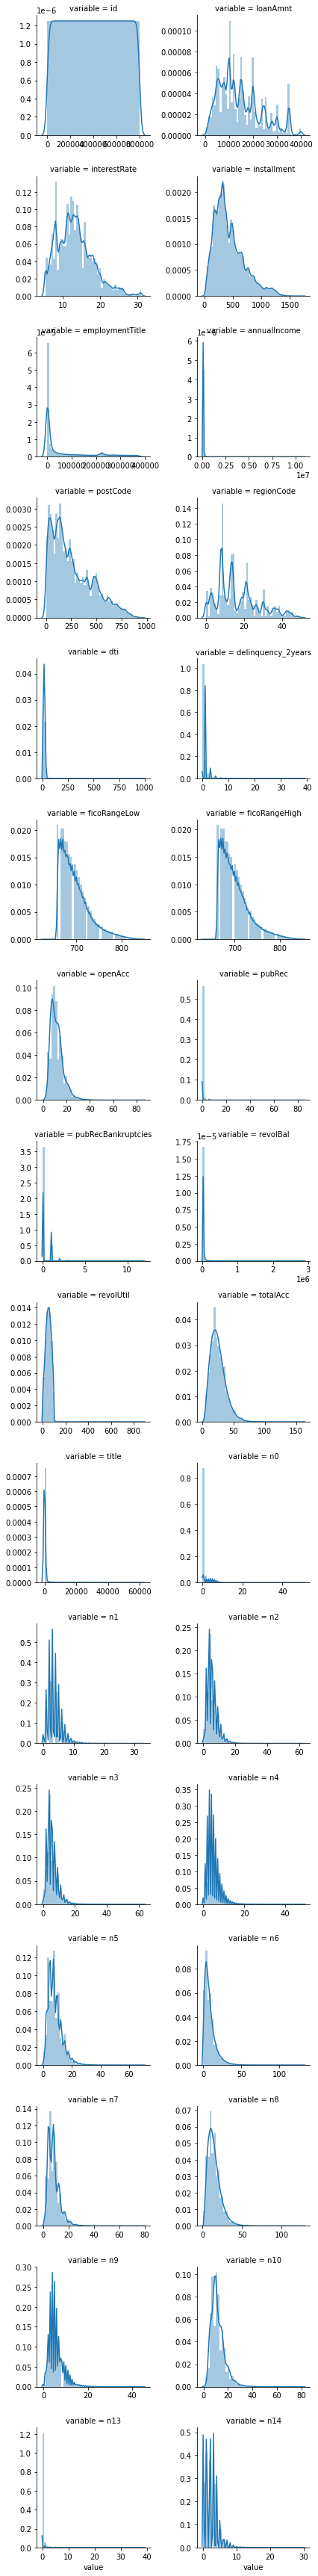

In [58]:
#数值连续型变量分析：分布可视化
f = pd.melt(train, value_vars=numerical_feat)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

isDefault             1.000000
interestRate          0.259202
n14                   0.085715
dti                   0.084961
n2                    0.070352
n9                    0.068978
loanAmnt              0.065210
revolUtil             0.059451
installment           0.051524
n1                    0.040659
n7                    0.032007
openAcc               0.026867
pubRec                0.026558
pubRecBankruptcies    0.026038
n10                   0.025583
delinquency_2years    0.020185
n4                    0.013156
n0                    0.010953
n13                   0.010101
postCode              0.007140
n6                    0.005350
regionCode            0.002822
id                   -0.000351
n8                   -0.005951
totalAcc             -0.012756
n5                   -0.018661
revolBal             -0.020929
title                -0.025173
purpose              -0.029208
employmentTitle      -0.030714
annualIncome         -0.042782
ficoRangeHigh        -0.130993
ficoRang

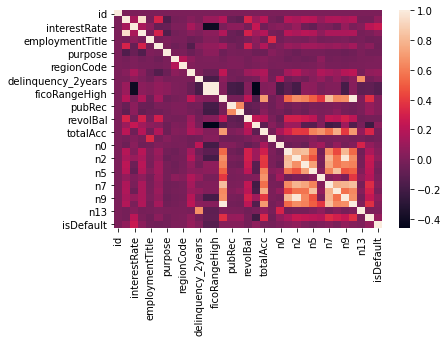

In [45]:
# 对数值类型数据进行特征相关性
numerical_feat.append("isDefault")
numeric = train[numerical_feat]
print(numeric.corr()['isDefault'].sort_values(ascending=False))
sns.heatmap(numeric.corr())

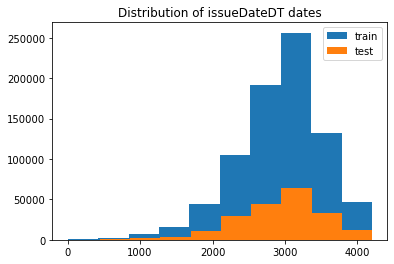

In [90]:
#转化成时间格式
train['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
train['issueDateDT'] = train['issueDate'].apply(lambda x: x-startdate).dt.days

#转化成时间格式
testA['issueDate'] = pd.to_datetime(testA['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
testA['issueDateDT'] = testA['issueDate'].apply(lambda x: x-startdate).dt.days

plt.hist(train['issueDateDT'], label='train');
plt.hist(testA['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');

In [91]:
del train["issueDate"]
del testA["issueDate"]

(array([640390.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 159610.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

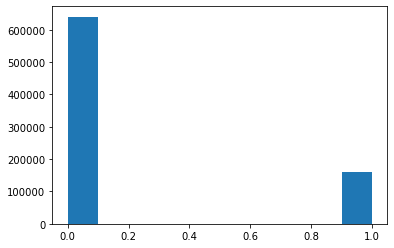

In [76]:
#了解label分布
plt.hist(label)

(b) 特征工程

In [65]:
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
warnings.filterwarnings('ignore')

In [92]:
#类别特征转数值
category_feat = ['grade', 'subGrade', 'employmentLength', 'earliesCreditLine','term','purpose',
'homeOwnership','verificationStatus','initialListStatus']
for f in category_feat:
    print(f, '类型数：', train[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentLength 类型数： 11
earliesCreditLine 类型数： 720
term 类型数： 2
purpose 类型数： 14
homeOwnership 类型数： 6
verificationStatus 类型数： 3
initialListStatus 类型数： 2


In [93]:
# 首先是类别特征中object类型中无法直接encoding的部分
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

for data in [train, testA]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].map(employmentLength_to_int)

In [94]:
for data in [train, testA]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [95]:
# one-hot encoding
train = pd.get_dummies(train, columns=category_feat, drop_first=True)
testA = pd.get_dummies(testA, columns=category_feat, drop_first=True)

In [70]:
#缺失值处理
#按照平均数填充数值型特征
train = train.fillna(train.median())
testA = testA.fillna(testA.median())

,loanAmnt,interestRate,installment,employmentTitle,annualIncome,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,title,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14,issueDateDT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,subGrade_A2,subGrade_A3,subGrade_A4,subGrade_A5,subGrade_B1,subGrade_B2,subGrade_B3,subGrade_B4,subGrade_B5,subGrade_C1,subGrade_C2,subGrade_C3,subGrade_C4,subGrade_C5,subGrade_D1,subGrade_D2,subGrade_D3,subGrade_D4,subGrade_D5,subGrade_E1,subGrade_E2,subGrade_E3,subGrade_E4,subGrade_E5,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5,employmentLength_1.0,employmentLength_2.0,employmentLength_3.0,employmentLength_4.0,employmentLength_5.0,employmentLength_6.0,employmentLength_7.0,employmentLength_8.0,employmentLength_9.0,employmentLength_10.0,earliesCreditLine_1946,earliesCreditLine_1950,earliesCreditLine_1951,earliesCreditLine_1952,earliesCreditLine_1953,earliesCreditLine_1954,earliesCreditLine_1955,earliesCreditLine_1956,earliesCreditLine_1957,earliesCreditLine_1958,earliesCreditLine_1959,earliesCreditLine_1960,earliesCreditLine_1961,earliesCreditLine_1962,earliesCreditLine_1963,earliesCreditLine_1964,earliesCreditLine_1965,earliesCreditLine_1966,earliesCreditLine_1967,earliesCreditLine_1968,earliesCreditLine_1969,earliesCreditLine_1970,earliesCreditLine_1971,earliesCreditLine_1972,earliesCreditLine_1973,earliesCreditLine_1974,earliesCreditLine_1975,earliesCreditLine_1976,earliesCreditLine_1977,earliesCreditLine_1978,earliesCreditLine_1979,earliesCreditLine_1980,earliesCreditLine_1981,earliesCreditLine_1982,earliesCreditLine_1983,earliesCreditLine_1984,earliesCreditLine_1985,earliesCreditLine_1986,earliesCreditLine_1987,earliesCreditLine_1988,earliesCreditLine_1989,earliesCreditLine_1990,earliesCreditLine_1991,earliesCreditLine_1992,earliesCreditLine_1993,earliesCreditLine_1994,earliesCreditLine_1995,earliesCreditLine_1996,earliesCreditLine_1997,earliesCreditLine_1998,earliesCreditLine_1999,earliesCreditLine_2000,earliesCreditLine_2001,earliesCreditLine_2002,earliesCreditLine_2003,earliesCreditLine_2004,earliesCreditLine_2005,earliesCreditLine_2006,earliesCreditLine_2007,earliesCreditLine_2008,earliesCreditLine_2009,earliesCreditLine_2010,earliesCreditLine_2011,earliesCreditLine_2012,earliesCreditLine_2013,earliesCreditLine_2014,earliesCreditLine_2015,term_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,homeOwnership_1,homeOwnership_2,homeOwnership_3,homeOwnership_4,homeOwnership_5,verificationStatus_1,verificationStatus_2,initialListStatus_1
0,35000.0,19.52,917.97,320.0,110000.0,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,2.0,2587,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,18000.0,18.49,461.90,219843.0,46000.0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1723.0,0.0,3.0,5.0,5.0,10.0,7.0,7.0,7.0,13.0,5.0,13.0,0.0,2.0,1888,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,12000.0,16.99,298.17,31698.0,74000.0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,4.0,3044,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [96]:
#异常值处理
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [97]:
data_train = train.copy()
for fea in numerical_feat:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

正常值    800000
Name: id_outliers, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    800000
Name: loanAmnt_outliers, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    794259
异常值      5741
Name: interestRate_outliers, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
正常值    792046
异常值      7954
Name: installment_outliers, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
正常值    800000
Name: employmentTitle_outliers, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    793973
异常值      6027
Name: annualIncome_outliers, dtype: int64
annualIncome_outliers
异常值       756
正常值    158854
Name: isDefault, dtype: int64
**********
正常值    800000
Name: isDefault_outliers, dtype: int64
isDefault_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
正常值    798931
异

In [99]:
#删除异常值
for fea in numerical_feat:
    train = train[data_train[fea+'_outliers']=='正常值']
    train = train.reset_index(drop=True)

In [100]:
train

,id,loanAmnt,interestRate,installment,employmentTitle,annualIncome,isDefault,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,title,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n13,n14,issueDateDT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,subGrade_A2,subGrade_A3,subGrade_A4,subGrade_A5,subGrade_B1,subGrade_B2,subGrade_B3,subGrade_B4,subGrade_B5,subGrade_C1,subGrade_C2,subGrade_C3,subGrade_C4,subGrade_C5,subGrade_D1,subGrade_D2,subGrade_D3,subGrade_D4,subGrade_D5,subGrade_E1,subGrade_E2,subGrade_E3,subGrade_E4,subGrade_E5,subGrade_F1,subGrade_F2,subGrade_F3,subGrade_F4,subGrade_F5,subGrade_G1,subGrade_G2,subGrade_G3,subGrade_G4,subGrade_G5,employmentLength_1.0,employmentLength_2.0,employmentLength_3.0,employmentLength_4.0,employmentLength_5.0,employmentLength_6.0,employmentLength_7.0,employmentLength_8.0,employmentLength_9.0,employmentLength_10.0,earliesCreditLine_1946,earliesCreditLine_1950,earliesCreditLine_1951,earliesCreditLine_1952,earliesCreditLine_1953,earliesCreditLine_1954,earliesCreditLine_1955,earliesCreditLine_1956,earliesCreditLine_1957,earliesCreditLine_1958,earliesCreditLine_1959,earliesCreditLine_1960,earliesCreditLine_1961,earliesCreditLine_1962,earliesCreditLine_1963,earliesCreditLine_1964,earliesCreditLine_1965,earliesCreditLine_1966,earliesCreditLine_1967,earliesCreditLine_1968,earliesCreditLine_1969,earliesCreditLine_1970,earliesCreditLine_1971,earliesCreditLine_1972,earliesCreditLine_1973,earliesCreditLine_1974,earliesCreditLine_1975,earliesCreditLine_1976,earliesCreditLine_1977,earliesCreditLine_1978,earliesCreditLine_1979,earliesCreditLine_1980,earliesCreditLine_1981,earliesCreditLine_1982,earliesCreditLine_1983,earliesCreditLine_1984,earliesCreditLine_1985,earliesCreditLine_1986,earliesCreditLine_1987,earliesCreditLine_1988,earliesCreditLine_1989,earliesCreditLine_1990,earliesCreditLine_1991,earliesCreditLine_1992,earliesCreditLine_1993,earliesCreditLine_1994,earliesCreditLine_1995,earliesCreditLine_1996,earliesCreditLine_1997,earliesCreditLine_1998,earliesCreditLine_1999,earliesCreditLine_2000,earliesCreditLine_2001,earliesCreditLine_2002,earliesCreditLine_2003,earliesCreditLine_2004,earliesCreditLine_2005,earliesCreditLine_2006,earliesCreditLine_2007,earliesCreditLine_2008,earliesCreditLine_2009,earliesCreditLine_2010,earliesCreditLine_2011,earliesCreditLine_2012,earliesCreditLine_2013,earliesCreditLine_2014,earliesCreditLine_2015,term_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13,homeOwnership_1,homeOwnership_2,homeOwnership_3,homeOwnership_4,homeOwnership_5,verificationStatus_1,verificationStatus_2,initialListStatus_1
0,0,35000.0,19.52,917.97,320.0,110000.0,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,2.0,2587,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,18000.0,18.49,461.90,219843.0,46000.0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1723.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,1888,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2,12000.0,16.99,298.17,31698.0,74000.0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,4.0,3044,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# 特征选择：过滤式
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
#选择K个最好的特征，返回选择特征后的数据
#第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，
#输出二元组（评分，P值）的数组，数组第i项为第i个特征的评分和P值。在此定义为计算相关系数
#参数k为选择的特征个数
SelectKBest(k=5).fit_transform(train,target_train)

In [ ]:
# 嵌入式
from sklearn.feature_selection import SelectFromModel

In [101]:
# PCA降维
from sklearn.decomposition import PCA
